<a href="https://colab.research.google.com/github/morganLantrade/Projets_machine_learning/blob/main/projet_mlp/projet_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/morganLantrade/Projets_machine_learning/blob/main/projet_mlp/projet_mlp.ipynb" target="_blank"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="Open In Colab" width="70" height="70" style="float:left; padding: 10px; " ></a>
# MLP : Multi-Layer Perceptron 

## Fonctionnement d'un MLP sur une observation

<a href="https://www.researchgate.net/figure/Multilayer-perceptron-MLP-architecture-with-two-hidden-layers-and-one-prediction-output_fig1_349630467"><img src="https://www.researchgate.net/publication/349630467/figure/fig1/AS:995457505447936@1614346972386/Multilayer-perceptron-MLP-architecture-with-two-hidden-layers-and-one-prediction-output.png" alt="Multilayer perceptron (MLP) architecture with two hidden layers and one prediction output." target="_blank"/></a>

## Fonctionnement d'un neurone d'une couche d'un perceptron

<a href="https://www.researchgate.net/figure/La-structure-dun-neurone-artificiel_fig3_303447451"><img src="https://www.researchgate.net/profile/Safae-Laqrichi/publication/303447451/figure/fig3/AS:644326015123459@1530630701780/La-structure-dun-neurone-artificiel.png" alt="3-La structure d'un neurone artificiel" target="_blank"/></a>

#### Importations

In [ ]:
#sur colab
#!wget "https://raw.githubusercontent.com/morganLantrade/Projets_machine_learning/main/projet_mlp/MLP.py"

In [6]:
import sklearn
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from MLP import *


warnings.filterwarnings('ignore')

### Fonctions d'activation

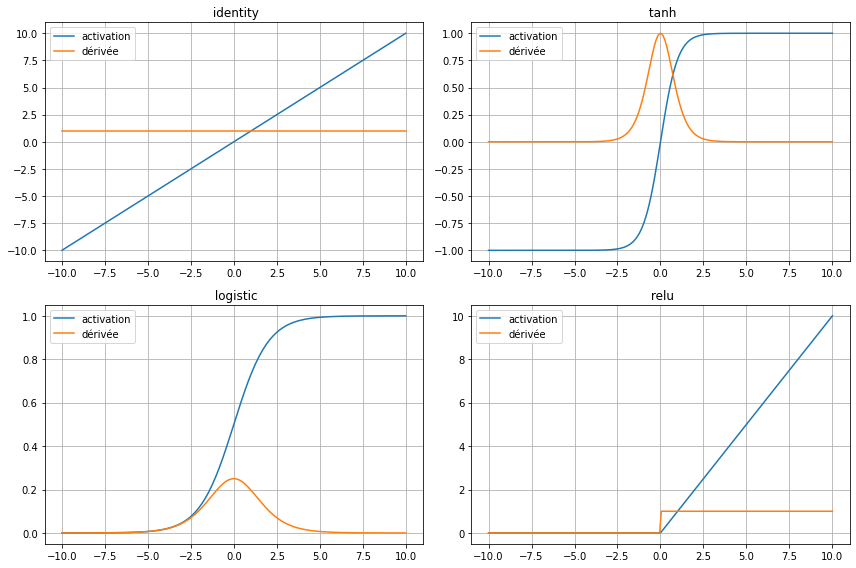

In [7]:
show_Activations()        

<div class="alert alert-block alert-info">
<b>Remarque:</b> La liste d'activations est non éxhaustive et le choix de l'activation dépend du type de problème ( régression , classification ( binaire / multiclasse ) , ...
On commençera par implémenter un MLP avec la fonction sigmoïde et on essayera pour une classification binaire des couches cachées différentes et garder la derniere couche sigmoïde (pour finir entre 0 et 1).</div>

### Fonctions coût 

$$\begin{alignat}{2} L_{MSE}=& \frac{1}{m}.\sum_{k=1}^{m} (y_k-a_k)^2\\
L_{log\_loss}=& -\frac{1}{m}.\sum_{k=1}^{m} y_{k}.ln(a_{k})+(1-y_k).ln(1-a_k)\\
\end{alignat}$$

### Dérivées coût

$$\begin{alignat}{2} 
\frac{\partial L_{MSE}}{\partial a_k}=& \frac{2}{m}.\sum_{k=1}^{m} (a_k-y_k)\\
\frac{\partial L_{log\_loss}}{\partial a_k} =& \frac{1}{m}.\sum_{k=1}^m \frac{a_k-y_k}{a_k(1-a_k)})\\
\end{alignat}$$

### Formes de nos données vectorisées pour une couche l:
- m échantillons 
- $n^{[l-1]}$ variables  en entrée 
- $n^{[l]}$ en sortie 

$$\begin{alignat}{2} A^{[0]}= X = & \underbrace{\begin{bmatrix}
x_{1,1} & x_{1,2}&...& x_{1,m}\\
... &  ...&   ...&   ...&\\
x_{n^{[0]},1} & x_{n^{[0]},2}&...& x_{n^{[0]},m}\\
\end{bmatrix}}_{(n^{[0]},m)}\\
Y = & \underbrace{\begin{bmatrix}
y_{1} & y_{2} &... &y_{m}\end{bmatrix}}_{(1,m)}\\
W^{[l]} = & \underbrace{\begin{bmatrix}w^{[l]}_{1,1} & w^{[l]}_{1,2} &... &w^{[l]}_{1,n^{[l-1]}}\\
... & ... &... &... \\
w^{[l]}_{n^{[l]},1} & w^{[l]}_{n^{[l]},2} &... &w^{[l]}_{n^{[l]},n^{[l-1]}}\\
\end{bmatrix}}_{(n^{[l]},n^{[l-1]})} & B^{[l]}= \underbrace{\begin{bmatrix}
b^{[l]}_{1}\\
...\\
b^{[l]}_{n^{[l]}}\end{bmatrix}}_{(n^{[l]},1)}
\end{alignat}$$

<div class="alert alert-block alert-info">
<b>Remarque :</b>  Pour une simplication de notre vectorisation nous inclurons une ligne de 1 dans X et une colonne de b dans W.</div>

### Forward propagation 

$$
\forall l \in \{1,...,L\} : couches\\
\forall j \in \{1,...,n^{[L]}\} : neurones\\
\forall k \in \{1,...,m\} : échantillons
$$ 

$$\begin{alignat}{2} z^{[l]}_{jk} = & \sum_{i=1}^{n^{[l-1]}} w^{[l]}_{ji}.a^{[l-1]}_{ik} + b_j^{[l]}\\
\newline
\underbrace{Z}_{(n^{[l]},m)}^{[l]}  = & \begin{bmatrix}
\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{1,i}.\color{green}a^{[l-1]}_{i,1} + \color{blue}b_1^{[l]} &, &\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{1,i}.\color{green}a^{[l-1]}_{i,2} + \color{blue}b_1^{[l]} &, &... &, &\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{1,i}.\color{green}a^{[l-1]}_{im} + \color{blue}b_1^{[l]}\\
... &,  &... &, &... &,  & ...\\
\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{n^{[l]},i}.\color{green}a^{[l-1]}_{i,1} + \color{blue}b^{[l]}_{n^{[l]}} &, &\sum_{i=1}^{n^{[l-1]}}\color{red}w^{[l]}_{n^{[l]},i}.\color{green}a^{[l-1]}_{i,2} + \color{blue}b^{[l]}_{n^{[l]}} &, &... &, &\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{n^{[l]},i}.\color{green}a^{[l-1]}_{i,m} + \color{blue}b^{[l]}_{n^{[l]}}\\
\end{bmatrix}\\
\newline
\underbrace{Z}_{(n^{[l]},m)}^{[l]} = &\color{red}{\underbrace{{\begin{bmatrix}w^{[l]}_{1,1} & w^{[l]}_{1,2} &{...} &w^{[l]}_{1,n^{[l-1]}}\\
... & ... &... &... \\
w^{[l]}_{n^{[l]},1} & w^{[l]}_{n^{[l]},2} &{...} &w^{[l]}_{n^{[l]},n^{[l-1]}} \\
\end{bmatrix}}}_{(n^{[l]},n^{[l-1]})}}.\color{green}{\underbrace{\begin{bmatrix}
a^{[l-1]}_{1,1} & a^{[l-1]}_{1,2}&...& a^{[l-1]}_{1,m}\\
... &  ...&   ...&   ...&\\
a_{n^{[l-1]},1} & a^{[l-1]}_{n^{[l-1]},2}&...& a^{[l-1]}_{n^{[l-1]},m}\\
\end{bmatrix}}_{(n^{[l-1]},m)}}+\color{blue}{\underbrace{\begin{bmatrix}
b^{[l]}_1& ...& b^{[l]}_1\\
{...}& ...& ...\\
b^{[l]}_{n^{[l]}}& ...& b^{[l]}_{n^{[l]}} \end{bmatrix}}_{(n^{[l-1]},m)}}\\
\underbrace{Z}_{(n^{[l]},m)}^{[l]} = & W^{[l]}.A^{[l-1]} + B^{[l]} \\
\newline
\underbrace{A}^{[l]}_{(n^{[l]},m)}= &\frac{1}{1+e^{-Z^{[l]}}}
\end{alignat}$$

<div class="alert alert-block alert-success">
On obtient les activations où les lignes correspondent aux neurones et colonnes aux échantillons.</div>


<div class="alert alert-block alert-info">
<b>Remarque 1:</b> Le produit matriciel nous permet de faire la somme de 1 a m pour obtenir la matrice Z.
    
<b>Remarque 2:</b> On peut réduire B à une seule colonne car numpy permet d'additionner toute une ligne selon un une valeur.</div>

### Backward propagation à L couches
- activation : <span style="color:green"> **sigmoide** </span> 
- cost : <span style="color:brown"> **MSE** </span>
- cost : <span style="color:purple"> **log_loss** </span>

#### Calcul des dérivées de la derniere couche L : 


$$
\begin{alignat}{5}
\require{cancel}
&\underbrace{\frac{\partial L}{\partial W^{[L]}}}_{(n^{[L]},n^{[L-1]})} &= &\color{red}{\frac{\partial L}{\partial A^{[L]}} }*\color{green}{\frac{\partial A^{[L]}}{\partial Z^{[L]}}}*\color{blue}{\frac{\partial Z^{[L]}}{\partial W^{[L]}}}\\
&\underbrace{\color{blue}{\frac{\partial Z^{[L]}}{\partial W^{[L]}}}}_{(n^{[L-1]},m)} &= & A^{[L-1]}\\
&\underbrace{\color{blue}{\frac{\partial Z^{[L]}}{\partial B^{[L]}}}}_{(n^{[L-1]},1)} &= & 1\\
&\color{red}{\frac{\partial L_{MSE}}{\partial a_{ji}^{[L]}}}&= & \frac{2}{m}*\sum_{i=1}^{m} (a_{ji}-y_i)\\
&\color{red}{\frac{\partial L_{log\_loss}}{\partial a_{ji}^{[L]}}}&= & \frac{1}{m}*\sum_{i=1}^m \frac{(a_{ji}-y_i)}{a_{ji}(1-a_{ji})}\\
&\color{green}{\underbrace{\frac{\partial a^{[L]}_{ji}}{\partial z^{[L]}}}_{(n^{[L]},m)}}&= & a^{[L]}_{ji}*(1-a^{[L]}_{ji})\\
&\color{purple}{\frac{\partial L_{MSE}}{\partial {z_{ji}}^{[L]}}}& =&\color{red}{\frac{\partial L}{{\partial a^{[L]}_{ji}}} }*\color{green}{\frac{{\partial a^{[L]}_{ji}}}{\partial {z_{ji}}^{[L]}}}= \color{red}{\frac{2}{m}*\sum_{i=1}^m (a^{[L]}_{ji}-y_i)*\color{green}{a^{[L]}_{ji}*(1-a^{[L]}_{ji})}}\\
&\color{brown}{\frac{\partial L_{log\_loss}}{\partial {z_{ji}}^{[L]}}}& =&\color{red}{\frac{\partial L}{\cancel{\partial a^{[L]}_{ji}}} }*\color{green}{\frac{\cancel{\partial a^{[L]}_{ji}}}{\partial {z_{ji}}^{[L]}}}= \color{brown}{\frac{1}{m}*\sum_{i=1}^m (a^{[L]}_{ji}-y_i)}\\
\newline
\newline
&\color{purple}{\underbrace{\frac{\partial L_{MSE}}{\partial W^{[L]}}}_{(n^{[L]},n^{[L-1]})}} &= &\boxed{\color{red}{\underbrace{\frac{2}{m}*(A^{[L]}-y)*\color{green}A^{\color{green}[\color{green}L\color{green}]}\color{green}*\color{green}(\color{green}1\color{green}-\color{green}A^{\color{green}[\color{green}L\color{green}]}\color{green})}_{(n^{[L]},m)}} .\color{blue}{\underbrace{{}^TA^{[L-1]}}_{(m,n^{[L-1]})}}}\\
&\color{purple}{\underbrace{\frac{\partial L_{MSE}}{\partial B^{[L]}}}_{(n^{[L]},1)}} &= &\boxed{\color{red}{\frac{2}{m}*\sum_{i=1}^m (a^{[L]}_{ji}-y_i)*\color{green}{a^{[L]}_{ji}*(1-a^{[L]}_{ji})}}}\\
\newline
&\color{brown}{\underbrace{\frac{\partial L_{log\_loss}}{\partial W^{[L]}}}_{(n^{[L]},n^{[L-1]})}} &= &\boxed{\color{brown}{\underbrace{\frac{1}{m}*(A^{[L]}-y)}_{(n^{[L]},m)}} .\color{blue}{\underbrace{{}^TA^{[L-1]}}_{(m,n^{[L-1]})}}}\\
&\color{brown}{\underbrace{\frac{\partial L_{log\_loss}}{\partial B^{[L]}}}_{(n^{[L]},1)}} &= &\boxed{\color{brown}{\frac{1}{m}*\sum_{i=1}^m (a^{[L]}_{ji}-y_i)}}\\
\end{alignat}$$

<div class="alert alert-block alert-info">
<b>Même principe que la propagation avant :</b>
    
Le produit matriciel permet de vectoriser la somme de 1 à m .

Pour les gradients de B, numpy nous permet de faire la somme de chaque ligne. (axis=1)</div>



#### Calcul des dérivées de la couche avec la règle de la chaine.

$$
\begin{alignat}{5}
\require{cancel}
&{\underbrace{\frac{\partial L}{\partial W^{[l]}}}_{(n^{[l]},n^{[l-1]})}} &= &{\frac{\partial L}{\cancel{\partial Z^{[L]}}}}*{\cancel{\frac{\partial Z^{[L]}}{\partial A^{[L-1]}}}}*{\cancel{\frac{\partial A^{[L-1]}}{\partial Z^{[L-1]}}}}*...*{\frac{\cancel{\partial A^{[l+2]}}}{\partial Z^{[l+1]}}}* \color{gray}{\frac{\partial Z^{[l+1]}}{\partial A^{[l]}}}* \color{green}{\frac{\partial A^{[l]}}{\partial Z^{[l]}}}*\color{blue}{\frac{\partial Z^{[l]}}{\partial W^{[l]}}}  \\
&{\frac{\partial L}{\partial Z^{[l]}}}& = &{\frac{\partial L}{\partial Z^{[l+1]}}}* \color{gray}{\frac{\partial Z^{[l+1]}}{\partial A^{[l]}}} *  \color{green}{\frac{\partial A^{[l]}}{\partial Z^{[l]}}} \\
& &=&\underbrace{\underbrace{\color{gray}{{}^TW^{[l+1]}}}_{(n^{[l]},n^{[l+1]})}.\underbrace{{\frac{\partial L}{\partial Z^{[l+1]}}}}_{(n^{[l+1]},m)}* \underbrace{\color{green}{A^{[l]}*(1- A^{[l]})}}_{(n^{[l]},m)}}_{(n^{[l]},m)}\\
\newline
&\color{purple}{\underbrace{\frac{\partial L_{MSE}}{\partial W^{[l]}}}_{(n^{[l]},n^{[l-1]})}} &= &\boxed{\underbrace{\color{gray}{{}^TW^{[l+1]}}}_{(n^{[l]},n^{[l+1]})}.\underbrace{\color{purple}{\frac{\partial L_{MSE}}{\partial Z^{[l+1]}}}}_{(n^{[l+1]},m)}* \underbrace{\color{green}{A^{[l]}*(1- A^{[l]})}}_{(n^{[l]},m)}.\color{blue}{\underbrace{{}^TA^{[l-1]}}_{(m,n^{[l-1]})}}}\\
&\color{purple}{\underbrace{\frac{\partial L_{MSE}}{\partial B^{[l]}}}_{(n^{[l]},1)}} &=  &\boxed{\color{purple}{\sum _{k=0}^{m} \frac{\partial L_{MSE}}{\partial Z^{[l]}}}} \\
&\color{brown}{\underbrace{\frac{\partial L_{log\_loss}}{\partial W^{[l]}}}_{(n^{[l]},n^{[l-1]})}} &= &\boxed{\underbrace{\color{gray}{{}^TW^{[l+1]}}}_{(n^{[l]},n^{[l+1]})}.\underbrace{\color{brown}{\frac{\partial L_{log\_loss}}{\partial Z^{[l+1]}}}}_{(n^{[l+1]},m)}* \underbrace{\color{green}{A^{[l]}*(1- A^{[l]})}}_{(n^{[l]},m)}.\color{blue}{\underbrace{{}^TA^{[l-1]}}_{(m,n^{[l-1]})}}}\\
&\color{brown}{\underbrace{\frac{\partial L_{log\_loss}}{\partial B^{[l]}}}_{(n^{[l]},1)}} &=  &\boxed{\color{brown}{\sum _{k=0}^{m} \frac{\partial L_{log\_loss}}{\partial Z^{[l]}}}} \\
\end{alignat}$$

<div class="alert alert-block alert-success">
Nous avons réussi à exprimer les gradients de la couche L-1 par ceux de la couche L, nous pouvons donc maintenant récursivement
remonter jusqu a la couche 0.
Nous avons maintenant toutes les formules pour implémenter notre MLP avec une activation : sigmoïde et un cout : log_loss ou MSE.</div>


<a href="https://github.com/morganLantrade/Projets_machine_learning/blob/main/projet_mlp/MLP.py" target="_blank"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="Open In Colab" width="70" height="70" style="float:left; padding: 10px; " ></a>
### Implémentation du modèle sur github

## Testons sur une classification binaire à deux variables

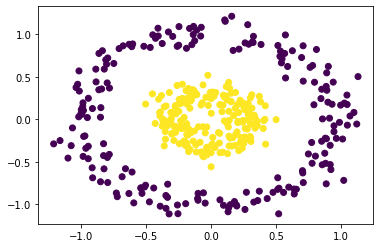

In [8]:
def cercle(n_circles,n_samples=400,noise=0.10,factor=0.3,random_state=0):
    '''retourne Xa,ya,Xt,yt formant 1 cercle , 2 cercles ou 4 cercles'''
    Xa, ya = make_circles(n_samples=n_samples, noise=0.10, factor=0.3, random_state=0)
    Xt, yt = make_circles(n_samples=n_samples//4, noise=0.10, factor=0.3, random_state=0)
    if n_circles==2:
        Xa=np.concatenate((Xa+[1,-1],Xa+[-2,-1]))
        Xt=np.concatenate((Xt+[1,-1],Xt+[-2,-1]))
        ya=np.concatenate((ya,ya))
        yt=np.concatenate((yt,yt))
    elif n_circles==4:
        Xa=np.concatenate((Xa+[1,-1],Xa+[1,2],Xa+[-2,2],Xa+[-2,-1]))
        Xt=np.concatenate((Xt+[1,-1],Xt+[1,2],Xt+[-2,2],Xt+[-2,-1]))
        ya=np.concatenate((ya,np.where(ya==1,0,1),ya,np.where(ya==1,0,1)))
        yt=np.concatenate((yt,np.where(yt==1,0,1),yt,np.where(yt==1,0,1)))
    ya = ya.reshape(ya.shape[0],1)
    yt = yt.reshape(yt.shape[0],1)
    return Xa,ya,Xt,yt


Xa,ya,Xt,yt=cercle(1)
plt.scatter(Xa[:,0], Xa[:,1], c=ya[:,0])
plt.show()

<div class="alert alert-block alert-info">
<b>Objectif : Comprendre l'influence </b>

- du nombre de neurones

- du nombre de couches 

- des fonctions d'activations et de coûts</div>

<div class="alert alert-block alert-warning">
<b>Remarque : </b> Il existe des modèles plus efficaces pour se genre de classication (SVM,Knn,...) </div>

## Un cercle

###### MSE un neurone

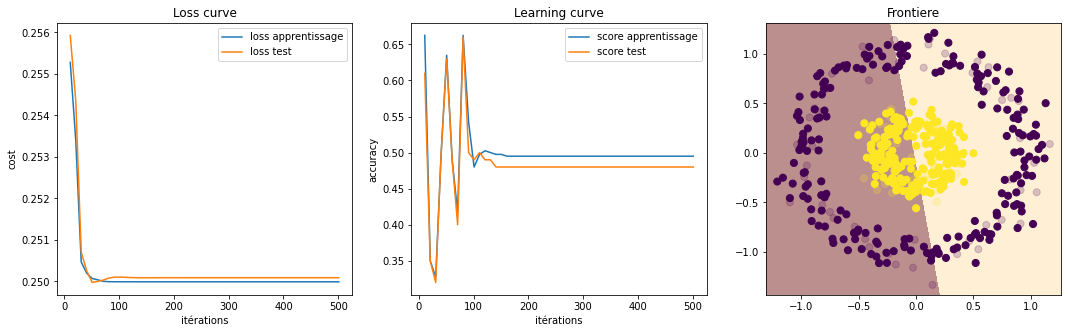

In [9]:
mlp=MLP(hidden_layers=[],activation='logistic',cost='MSE',learning_rate=0.2,max_iter=500,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

###### log_loss un neurone

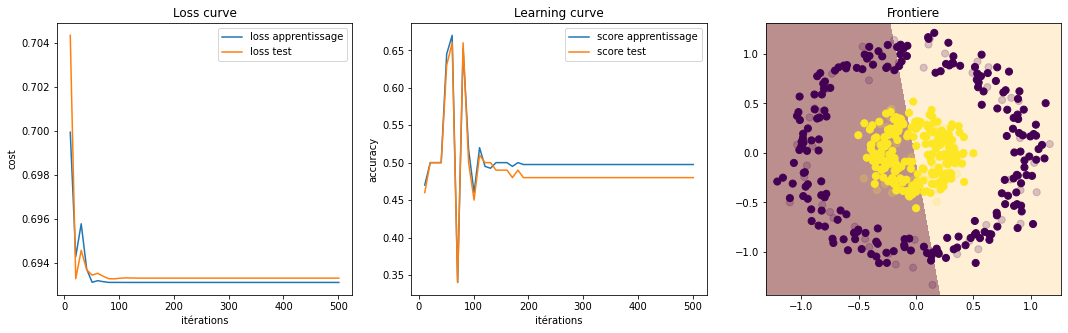

In [10]:
mlp=MLP(hidden_layers=[],activation='logistic',cost='log_loss',learning_rate=0.2,max_iter=500,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

<div class="alert alert-block alert-warning">
On essaye de séparer linéairement : impossible
</div>

#### Deux couches : Plusieurs neurones

##### 8 neurones , MSE, logistic

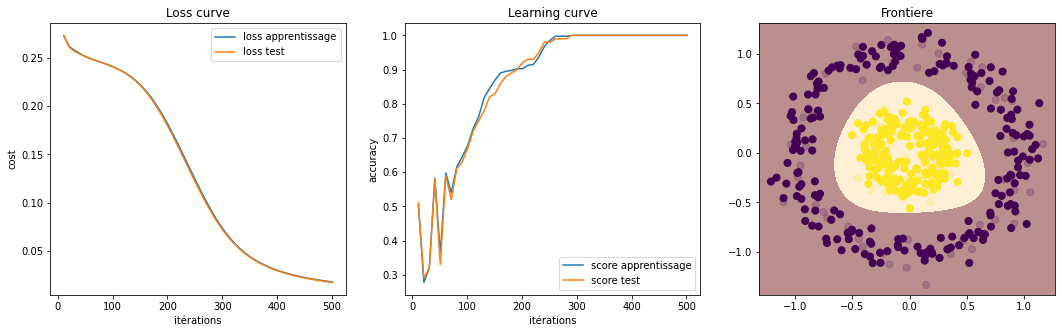

In [11]:
mlp=MLP(hidden_layers=[8],activation='logistic',cost='MSE',learning_rate=0.2,max_iter=500,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 8 neurones , log_loss, logistic

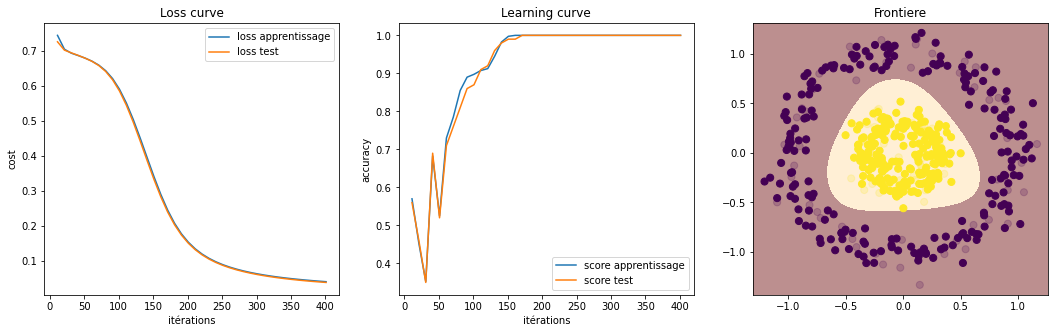

In [12]:
mlp=MLP(hidden_layers=[8],activation='logistic',cost='log_loss',learning_rate=0.2,max_iter=400,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 8 neurones , MSE, Relu

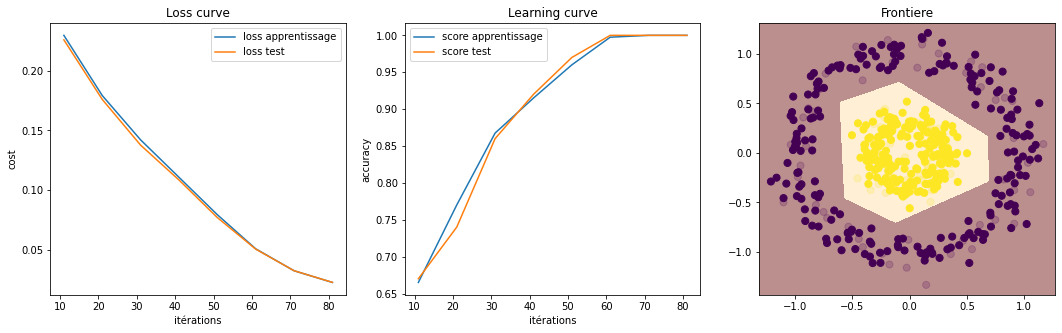

In [13]:
mlp=MLP(hidden_layers=[8],activation='relu',cost='MSE',learning_rate=0.2,max_iter=80,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 8 neurones , log_loss, Relu

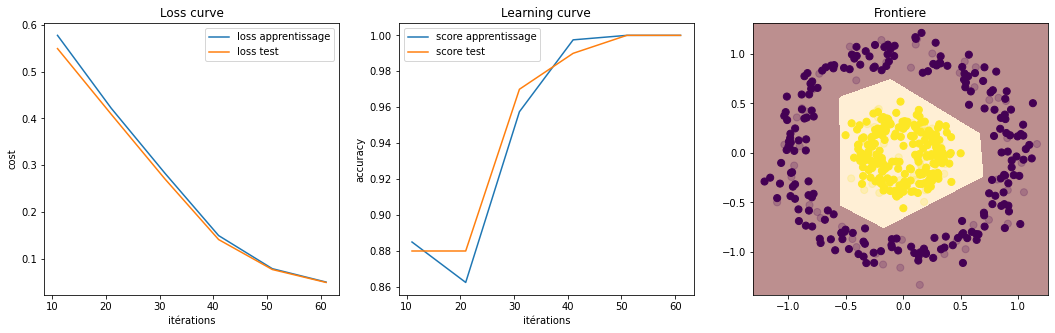

In [14]:
mlp=MLP(hidden_layers=[8],activation='relu',cost='log_loss',learning_rate=0.2,max_iter=60,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

<div class="alert alert-block alert-success">
On converge encore plus rapidement.
</div>

### Compliquons : 2 cercles

In [15]:
Xa,ya,Xt,yt=cercle(2)

#### 16 neurones , relu , MSE

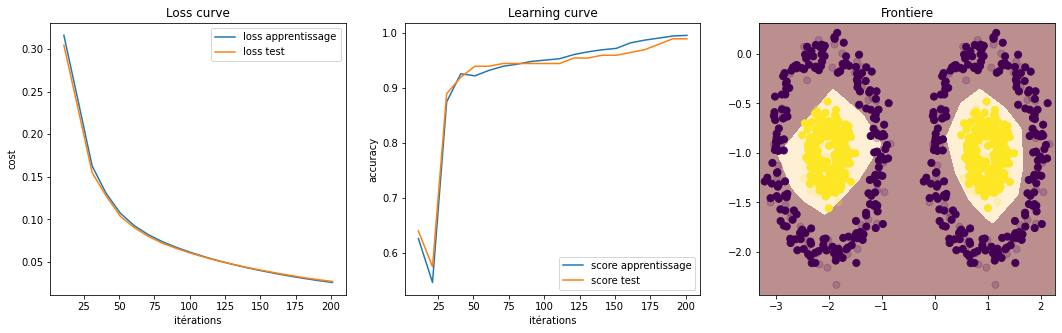

In [16]:
mlp=MLP(hidden_layers=[16],activation='relu',cost='MSE',learning_rate=0.2,max_iter=200,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 16 neurones , relu , log_loss

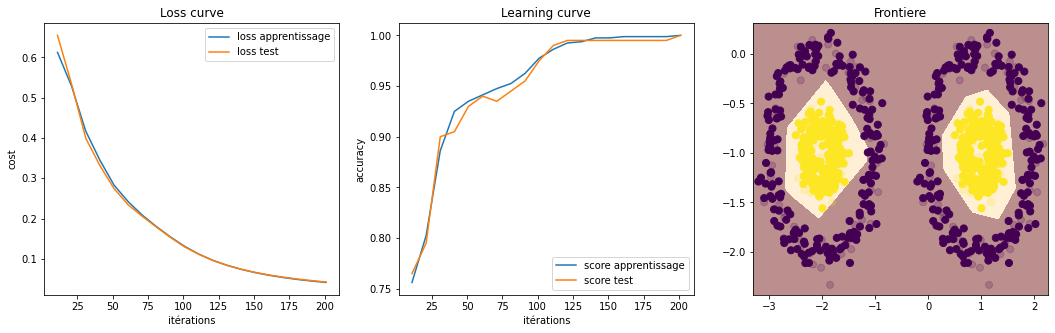

In [17]:
mlp=MLP(hidden_layers=[16],activation='relu',cost='log_loss',learning_rate=0.2,max_iter=200,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

<div class="alert alert-block alert-warning">
On remarque que la fonction <b> Relu </b> est plus rapide mais peut stopper l'apprentissage, pour plus d'info : 
<a href="https://deeplylearning.fr/cours-theoriques-deep-learning/fonction-dactivation/" target="_blank" >Explications des différentes versions de Relu</a>

Jouer avec différents random_state et nombre de neurones permet de voir le problème.</div>

#### 16 neurones , logistic , MSE

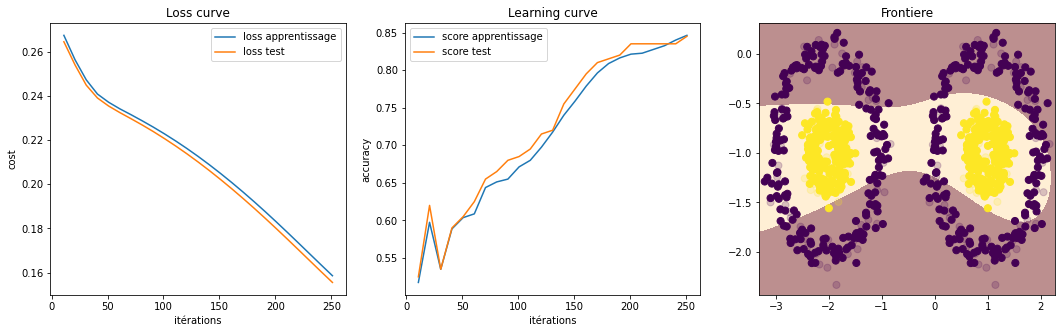

In [18]:
mlp=MLP(hidden_layers=[16],activation='logistic',cost='MSE',learning_rate=0.2,max_iter=250,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 16 neurones , logistic , log_loss

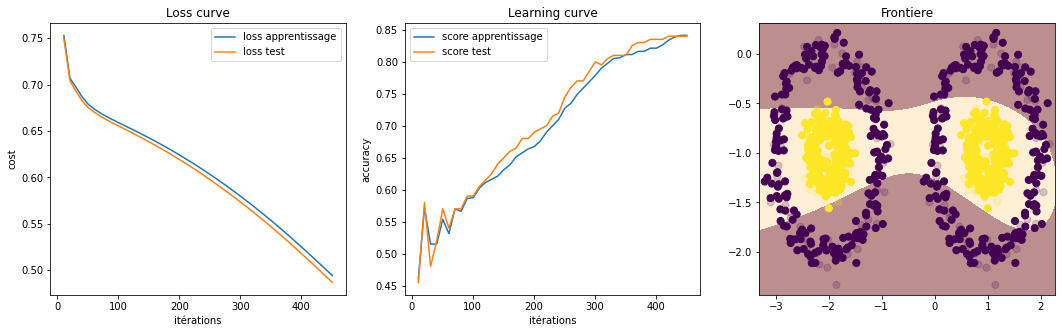

In [19]:
mlp=MLP(hidden_layers=[16],activation='logistic',cost='log_loss',learning_rate=0.05,max_iter=450,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

<div class="alert alert-block alert-warning">
Le modèle avec la fonction sigmoide n'a pas fini son apprentissage : <b> Augmentons le nombre de neurones,de couches ou le nombre d'itérations </b>.
</div>

#### 16x16 neurones , logistic , log_loss

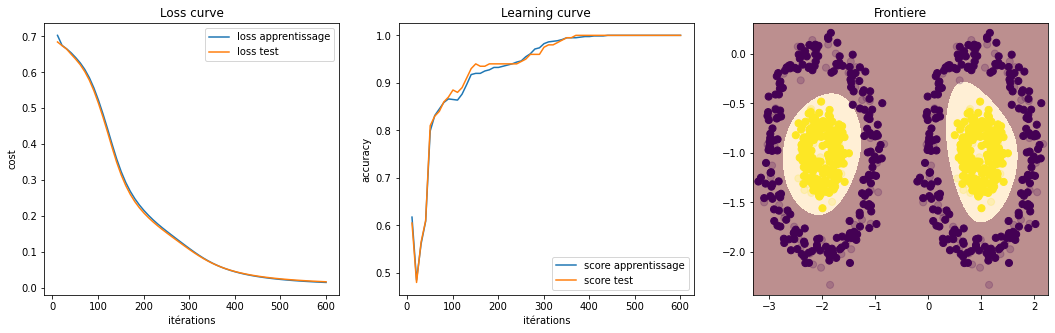

In [20]:
mlp=MLP(hidden_layers=[16,16],activation='logistic',cost='log_loss',learning_rate=0.2,max_iter=600,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 16x16 neurones , logistic , MSE

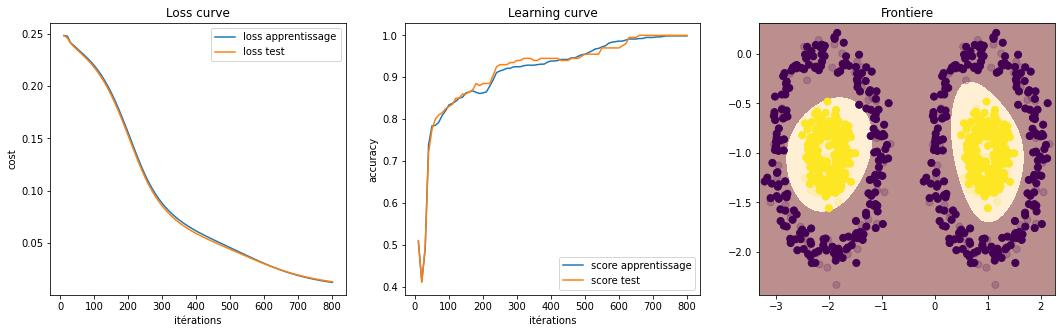

In [21]:
mlp=MLP(hidden_layers=[16,16],activation='logistic',cost='MSE',learning_rate=0.2,max_iter=800,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 4x2x2x4 neurones , log_loss , logistic 

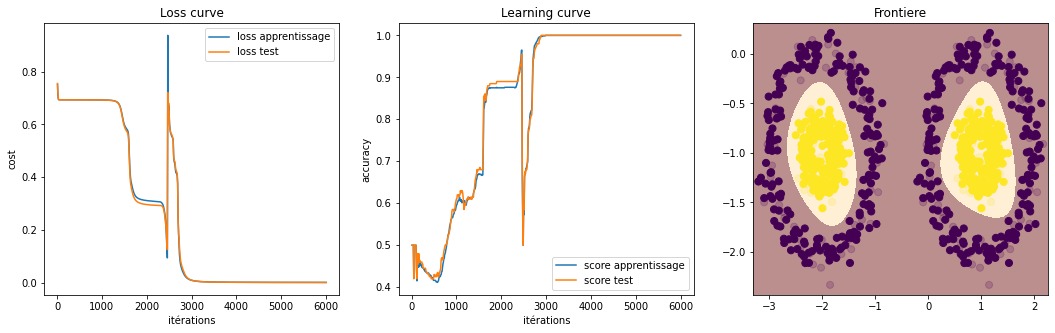

In [22]:
mlp=MLP(hidden_layers=[4,2,2,4],activation='logistic',cost='log_loss',learning_rate=0.2,max_iter=6000,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

# Pour finir: 4 cercles couleurs inversées 

In [23]:
Xa,ya,Xt,yt=cercle(4)

##### 32 neurones , log_loss , relu  

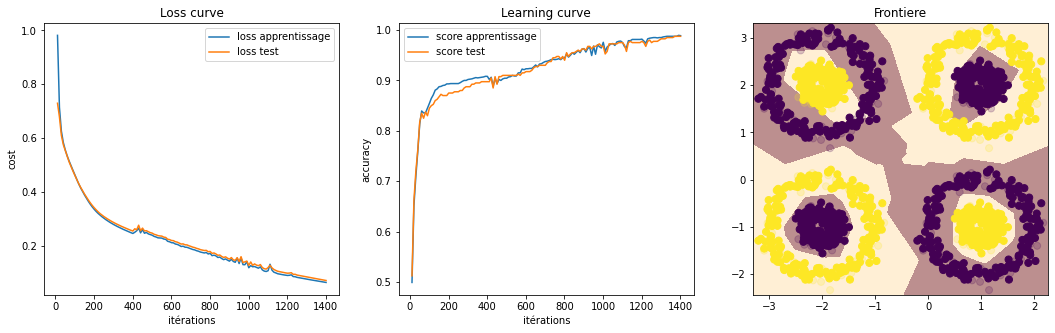

In [24]:
mlp=MLP(hidden_layers=[32],activation='relu',cost='log_loss',learning_rate=0.1,max_iter=1400,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

##### 32 neurones , MSE , relu 

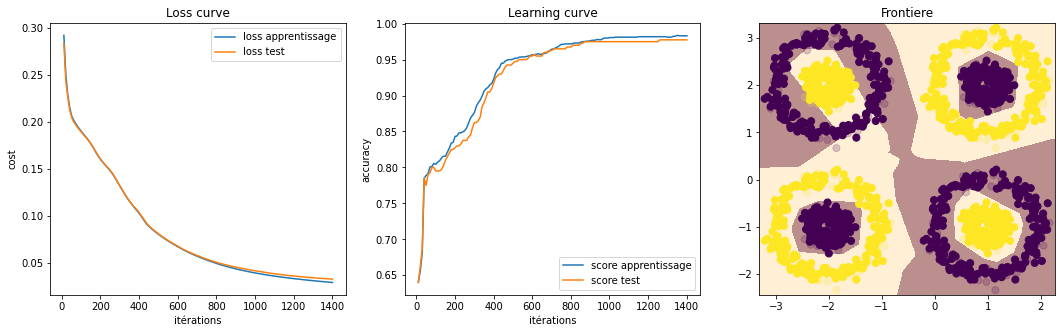

In [25]:
mlp=MLP(hidden_layers=[32],activation='relu',cost='MSE',learning_rate=0.1,max_iter=1400,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 16x16 neurones , log_loss , logistic 

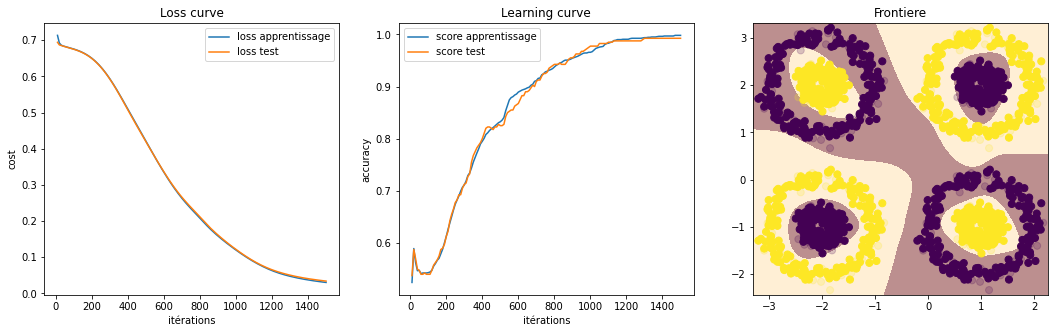

In [26]:
mlp=MLP(hidden_layers=[16,16],activation='logistic',cost='log_loss',learning_rate=0.2,max_iter=1500,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

#### 8x4x8 neurones , log_loss , logistic 

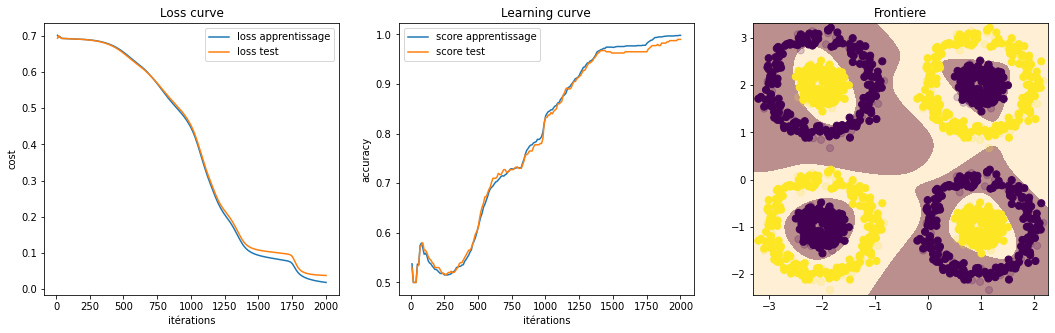

In [27]:
mlp=MLP(hidden_layers=[8,4,8],activation='logistic',cost='log_loss',learning_rate=0.2,max_iter=2000,random_state=42)
mlp.fit_show(Xa,ya,Xt,yt)

<div class="alert alert-block alert-info">
[SUITE] Tester sur des classifications multiclasses : pour cela on utilisera la fonction <b> soft_max </b> : à implémenter dans la classe MLP ...</div>